# Introduction to Ordinary Least Squares (OLS)

Ordinary Least Squares (OLS) is a fundamental statistical method used to estimate the parameters of a linear regression model. It forms the backbone of many data analysis techniques, providing a way to model the relationship between a dependent variable and one or more independent variables. The OLS method achieves this by minimizing the sum of the squared differences (residuals) between the observed data points and the values predicted by the model.

Given a dataset with $n$ observations $(x_1, y_1), (x_2, y_2), \dots, (x_n, y_n)$, OLS finds the line (or hyperplane, in higher dimensions) that best fits the data. For a simple linear model with one independent variable, the relationship is expressed as:
$$
y_i = a_0 + a_1 x_i + \epsilon_i
$$

where:
- $y_i$ is the observed dependent variable,
- $x_i$ is the independent variable,
- $a_0$ and $a_1$ are the intercept and slope of the line, respectively,
- $\epsilon_i$ represents the residual (error) for each observation.

The goal of OLS is to find the values of $a_0$ and $a_1$ that minimize the sum of squared residuals:
$$
S = \sum_{i=1}^n \epsilon_i^2 = \sum_{i=1}^n \left( y_i - (a_0 + a_1 x_i) \right)^2
$$
Deriving the OLS Equations: to minimize $S$, we differentiate it with respect to $a_0$ and $a_1$ and set the derivatives to zero. This ensures that the residual sum of squares $S$ is minimized.

Step 1: Differentiate with Respect to $a_0$. The partial derivative of $S$ with respect to $a_0$ is
$$
\frac{\partial S}{\partial a_0} = -2 \sum_{i=1}^n \left( y_i - (a_0 + a_1 x_i) \right)
$$
Setting this to zero:
$$
\sum_{i=1}^n \left( y_i - (a_0 + a_1 x_i) \right) = 0
$$
Simplify:
$$
\sum_{i=1}^n y_i = n a_0 + a_1 \sum_{i=1}^n x_i
$$

Step 2: Differentiate with Respect to $a_1$. The partial derivative of $S$ with respect to $a_1$ is:
$$
\frac{\partial S}{\partial a_1} = -2 \sum_{i=1}^n x_i \left( y_i - (a_0 + a_1 x_i) \right)
$$

Setting this to zero:
$$
\sum_{i=1}^n x_i \left( y_i - (a_0 + a_1 x_i) \right) = 0
$$
Simplify:
$$
\sum_{i=1}^n x_i y_i = a_0 \sum_{i=1}^n x_i + a_1 \sum_{i=1}^n x_i^2
$$

Step 3: Solve the System of Equations. We now have a system of two linear equations:
1. $\sum_{i=1}^n y_i = n a_0 + a_1 \sum_{i=1}^n x_i$
2. $\sum_{i=1}^n x_i y_i = a_0 \sum_{i=1}^n x_i + a_1 \sum_{i=1}^n x_i^2$

Solve these equations simultaneously to find $a_0$ and $a_1$. The solution for $a_1$ (the slope) is:
$$
a_1 = \frac{n \sum x_i y_i - \sum x_i \sum y_i}{n \sum x_i^2 - (\sum x_i)^2}
$$
The solution for $a_0$ (the intercept) is:
$$
a_0 = \frac{\sum y_i - a_1 \sum x_i}{n}
$$

The slope $a_1$ measures the change in the dependent variable $y$ for a one-unit change in the independent variable $x$. The intercept $a_0$ represents the value of $y$ when $x = 0$. Together, $a_0$ and $a_1$ define the line of best fit that minimizes the sum of squared residuals.

Ordinary Least Squares provides a robust framework for estimating the parameters of a linear regression model. By minimizing the residual sum of squares, it ensures that the fitted line is as close as possible to the observed data. This derivation highlights the mathematical elegance and simplicity of OLS, making it an indispensable tool in statistics and data analysis.


# Linearization Models: Exponential

The original function is:
$$
y(x) = \alpha_1 e^{\beta_1 x}
$$
To linearize this relationship, we apply the natural logarithm to both sides:
$$
\ln[y(x)] = \ln(\alpha_1) + \ln(e^{\beta_1 x})
$$
Using the logarithmic property
$$\ln(a \cdot b) = \ln(a) + \ln(b)4$$ 
the equation simplifies to
$$
\ln[y(x)] = \ln(\alpha_1) + \beta_1 x
$$
We then define the following terms to rewrite the equation in a linear form:
- $H(x) = \ln[y(x)]$,
- $a_0 = \ln(\alpha_1)$,
- $a_1 = \beta_1$.
The linearized relationship is expressed as:
$$
H(x) = a_0 + a_1 x
$$
This transformation allows the use of linear regression methods to determine the coefficients $a_0$ and $a_1$, which can then be used to reconstruct the original exponential model.

## Example

This example demonstrates how to fit an exponential model, $y(x) = \alpha e^{\beta x}$, to a dataset. Since the relationship is non-linear, the model is transformed into a linear form: $\ln(y) = \ln(\alpha) + \beta x$. By computing $\ln(y)$ for the dependent variable and applying linear regression, the coefficients $\ln(\alpha)$ and $\beta$ are determined.

The exponential model is reconstructed using $\alpha = e^{\ln(\alpha)}$ and validated by plotting the original data alongside the fitted curve. This approach leverages logarithmic transformations to simplify the problem, making it efficient and accurate for capturing exponential trends in data.


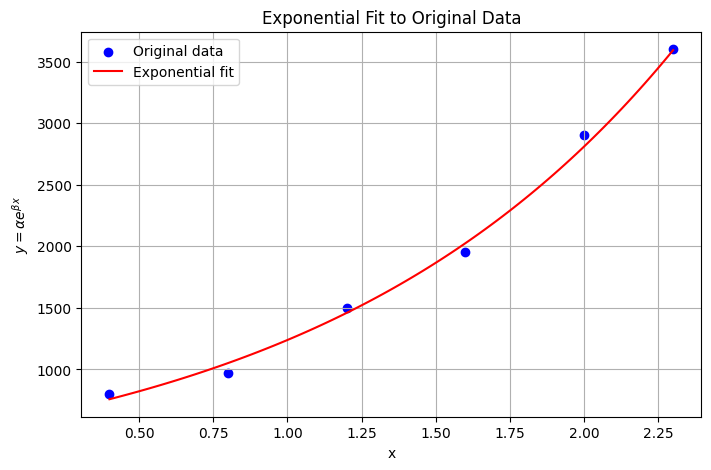

In [1]:
import numpy as np
import matplotlib.pyplot as plt 

# Provided data
x = np.array([0.4, 0.8, 1.2, 1.6, 2.0, 2.3])
y = np.array([800, 975, 1500, 1950, 2900, 3600])

# Logarithmic transformation for linearization
H = np.log(y)

# Linear adjustment (regression) for H(x) = a_0 + a_1 * x
coefficients = np.polyfit(x, H, 1)
a_1, a_0 = coefficients  # a_1 = slope, a_0 = intercept

# Adjusted function
def adjusted_function(x):
    return np.exp(a_0) * np.exp(a_1 * x)

# Values adjusted for the graphs
x_fit = np.linspace(min(x), max(x), 100)
y_fit = adjusted_function(x_fit)

# Plot 1: Original data
plt.figure(figsize=(8, 5))
plt.scatter(x, y, color="blue", label="Original data")
plt.plot(x_fit, y_fit, color="red", label="Exponential fit")
plt.title("Exponential Fit to Original Data")
plt.xlabel("x")
plt.ylabel("$y = \\alpha e^{\\beta x}$")
plt.legend()
plt.grid()
plt.show()


This code visualizes the linearized form of the exponential relationship. The plot displays the transformed data, where the dependent variable is $\ln(y)$, and the independent variable remains $x$. This transformation simplifies the original exponential model $y(x) = \alpha e^{\beta x}$ into the linear form $\ln(y) = \ln(\alpha) + \beta x$.

The scatter plot shows the linearized data points $(x, \ln(y))$, while the fitted line, $H(x) = a_0 + a_1 x$, represents the result of the linear regression. The coefficients $a_0 = \ln(\alpha)$ and $a_1 = \beta$ are used to calculate the best-fit line. This visualization highlights how effectively the linearized model approximates the data, providing a foundation for reconstructing the original exponential relationship.


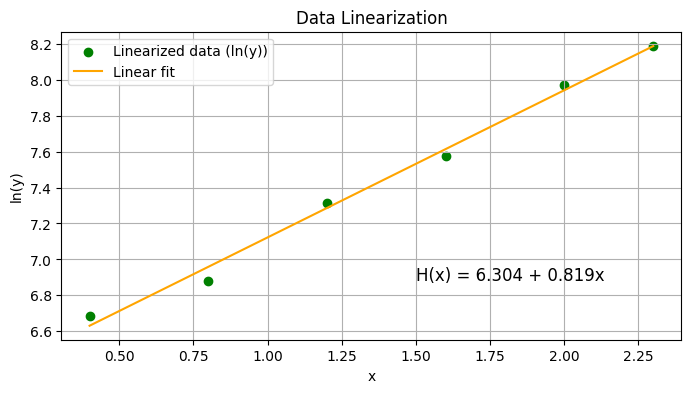

In [2]:
# Adding the equation of the line to the plot
plt.figure(figsize=(8, 4))
plt.scatter(x, H, color="green", label="Linearized data (ln(y))")
plt.plot(x_fit, a_0 + a_1 * x_fit, color="orange", label="Linear fit")
plt.title("Data Linearization")
plt.xlabel("x")
plt.ylabel("ln(y)")
plt.legend()
# Adding the equation to the plot as text
equation_text = f"H(x) = {a_0:.3f} + {a_1:.3f}x"
plt.text(1.5, min(H) + 0.2, equation_text, fontsize=12, color="black")  # Adjusted position
plt.grid()
plt.show()


## Exercise: Linearization and Ordinary Least Squares (OLS) in Exponential Modeling

In this exercise, we analyze a dataset where the relationship between variables is exponential. By linearizing the exponential model using logarithmic transformations, we can apply Ordinary Least Squares (OLS) regression to determine the model parameters. This process combines mathematical transformations and computational tools to create accurate models for non-linear data.

---
**Objective**

Given a dataset with the relationship $y = \alpha e^{\beta x}$, your task is to:
1. Transform the data into a linear form using the natural logarithm.
2. Apply OLS regression to find the coefficients of the linearized equation.
3. Reconstruct the original exponential model and visualize the fit.
4. Add the logarithmic transformation ($\ln(y)$) to the dataset for further analysis.

---
**Step-by-Step Instructions**

1. **Generate Exponential Data**  
   Use the `generate_exponential_data` function to simulate an exponential dataset. Specify the parameters $\alpha$ and $\beta$, the range of $x$, and the size of the dataset. A small random error is added to simulate real-world imperfections.

   Example:
   ```python
   df = generate_exponential_data(alpha=500, beta=0.8, size=10, x_min=0, x_max=3, error_scale=0.05, seed=42)

2. **Linearize the Exponential Model**  
    The exponential model $y = \alpha e^{\beta x}$ can be linearized by taking the natural logarithm of both sides:
$$
\ln(y) = \ln(\alpha) + \beta x
$$
Add a new column $\ln(y)$ to the dataset to store the transformed values.

3. **Fit the Linearized Model**  
    Use OLS regression on the transformed data to find the coefficients:
    - **Intercept**: $a_0 = \ln(\alpha)$
    - **Slope**: $a_1 = \beta$  
    Compute the exponential parameters:
    - $\alpha = e^{a_0}$
    - $\beta = a_1$

4. **Visualize the Results**  
    - Plot the original data with the fitted exponential curve: $ y = \alpha e^{\beta x}$
    - Plot the linearized data ($x$, $\ln(y)$) with the linear fit: $H(x) = a_0 + a_1x$

5. **Interpret the Model**
    - Print the linearized equation: $H(x) = a_0 + a_1x$
    - Print the reconstructed exponential model: $y(x) = \alpha e^{\beta x}$

---
**Expected Output**

1. **Generated DataFrame**  
   The dataset includes columns $x$, $y$, and the transformed $\ln(y)$:

   |    $x$    |      $y$       |   $\ln(y)$   |
   |-----------|----------------|--------------|
   |  0.000    |  512.42        |  6.239       |
   |  0.333    |  648.29        |  6.474       |
   |  0.667    |  879.90        |  6.780       |
   |  1.000    |  1197.51       |  7.088       |

2. **Linearized Equation**  
   After OLS regression, the linearized equation is:
   $$
   H(x) = 6.238 + 0.799x
   $$

3. **Exponential Model**  
   Reconstruct the exponential model:
   $$
   y(x) = 511.765 \cdot e^{0.799x}
   $$

4. **Visualizations**  
   - The original data with the exponential fit.
   - The linearized data with the linear regression line.


Linearized Equation:
H(x) = 6.238 + 0.799x

Exponential Model:
y(x) = 511.765 * exp(0.799x)


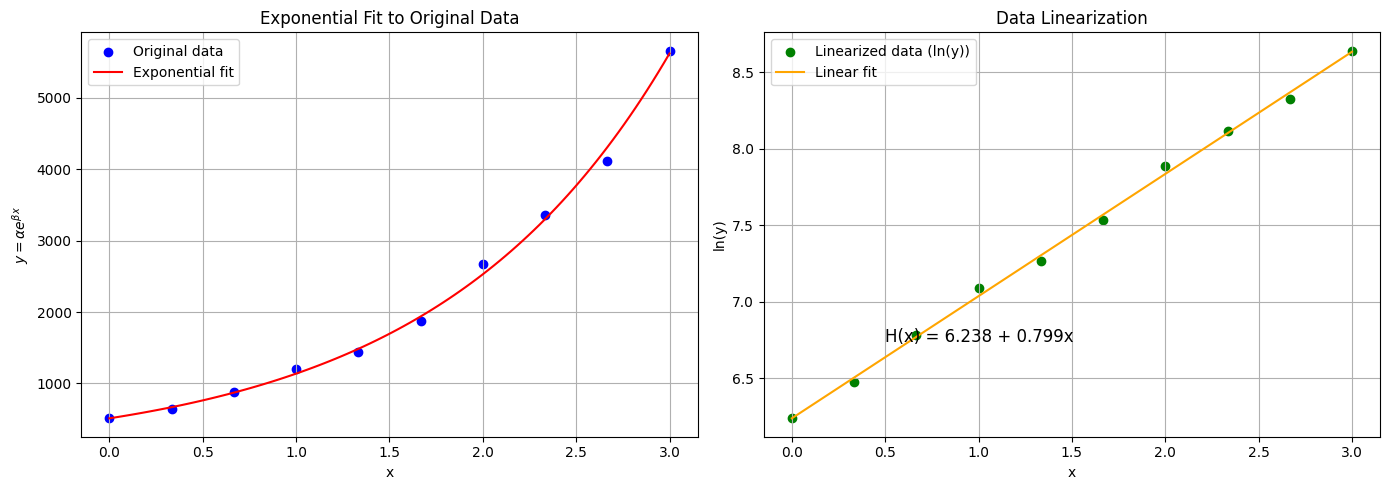

,x,y,ln(y)
0,0.000000,512.417854,6.239140
1,0.333333,648.289621,6.474338
2,0.666667,879.903758,6.779813
3,1.000000,1197.509596,7.087999
4,1.333333,1435.829517,7.269498
5,1.666667,1874.628001,7.536166
6,2.000000,2672.063519,7.890606
7,2.333333,3357.421721,8.118929
8,2.666667,4122.387711,8.324188
9,3.000000,5661.106567,8.641375


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

def exponential_analysis_with_ln(df, x_col, y_col):
    """
    Perform exponential model fitting, add ln(y) column, and plot the results.
    
    Parameters:
    - df: DataFrame containing the data.
    - x_col: Column name for the independent variable.
    - y_col: Column name for the dependent variable.
    
    Returns:
    - DataFrame with an additional ln(y) column.
    """
    # Extract data
    x = df[x_col].values
    y = df[y_col].values

    # Logarithmic transformation for linearization
    df['ln(y)'] = np.log(y)
    H = df['ln(y)'].values

    # Linear regression for H(x) = a_0 + a_1 * x
    coefficients = np.polyfit(x, H, 1)
    a_1, a_0 = coefficients  # a_1 = slope (beta), a_0 = intercept (ln(alpha))

    # Compute alpha and beta
    alpha = np.exp(a_0)
    beta = a_1

    # Adjusted function
    def adjusted_function(x_val):
        return alpha * np.exp(beta * x_val)

    # Values for plotting
    x_fit = np.linspace(min(x), max(x), 100)
    y_fit = adjusted_function(x_fit)

    # Subplots
    fig, axs = plt.subplots(1, 2, figsize=(14, 5))

    # Plot 1: Original data with exponential fit
    axs[0].scatter(x, y, color="blue", label="Original data")
    axs[0].plot(x_fit, y_fit, color="red", label="Exponential fit")
    axs[0].set_title("Exponential Fit to Original Data")
    axs[0].set_xlabel("x")
    axs[0].set_ylabel("$y = \\alpha e^{\\beta x}$")
    axs[0].legend()
    axs[0].grid()

    # Plot 2: Linearized data with linear fit
    axs[1].scatter(x, H, color="green", label="Linearized data (ln(y))")
    axs[1].plot(x_fit, a_0 + a_1 * x_fit, color="orange", label="Linear fit")
    axs[1].set_title("Data Linearization")
    axs[1].set_xlabel("x")
    axs[1].set_ylabel("ln(y)")
    axs[1].legend()
    # Add equation to the plot
    equation_text = f"H(x) = {a_0:.3f} + {a_1:.3f}x"
    axs[1].text(min(x) + 0.5, min(H) + 0.5, equation_text, fontsize=12, color="black")
    axs[1].grid()

    # Print results
    print("Linearized Equation:")
    print(f"H(x) = {a_0:.3f} + {a_1:.3f}x")
    print('')
    print(f"Exponential Model:")
    print(f"y(x) = {alpha:.3f} * exp({beta:.3f}x)")

    # Show plots
    plt.tight_layout()
    plt.show()
    
    # Return the dataframe with the ln(y) column added
    return df, fig

def generate_exponential_data(alpha, beta, size, x_min, x_max, error_scale=0.05, seed=None):
    """
    Generates a dataframe with exponential data and small random error.
    Parameters:
    - alpha: Coefficient for the exponential function.
    - beta: Exponent coefficient for the exponential function.
    - size: Number of data points to generate.
    - x_min: Minimum value of the independent variable x.
    - x_max: Maximum value of the independent variable x.
    - error_scale: Scale of the random error as a fraction of y.
    - seed: Random seed for reproducibility (default: None).
    Returns:
    - DataFrame with columns 'x' and 'y', where 'y' is the exponential data with added noise.
    """
    if seed is not None:
        np.random.seed(seed)
    
    # Generate linearly spaced x values
    x = np.linspace(x_min, x_max, size)
    
    # Generate the true exponential data
    y_true = alpha * np.exp(beta * x)
    
    # Add small random error
    error = np.random.normal(0, error_scale * y_true)
    y = y_true + error
    
    # Create the dataframe
    df = pd.DataFrame({"x": x, "y": y})
    return df

# Example usage with a generated dataframe
df_exponential = generate_exponential_data(alpha=500, beta=0.8, size=10, x_min=0, x_max=3, error_scale=0.05, seed=42)
df_exponential, fig = exponential_analysis_with_ln(df_exponential, "x", "y")
df_exponential

## Linearization Model: Hyperbolic

**Original Function**: The hyperbolic function is given by
$$
y(x) = \frac{1}{a + b x}
$$
**Linearization Process**: To linearize the model, we take the reciprocal of both sides
$$
\frac{1}{y(x)} = a + b x
$$
**Definitions**: We define the following terms
- $H(x) = \frac{1}{y(x)}$,
- $a_0 = a$ (the intercept),
- $a_1 = b$ (the slope).

**Linearized Relationship**: The linearized equation is expressed as
$$
H(x) = a_0 + a_1 x
$$
By transforming the dependent variable into its reciprocal, we convert the hyperbolic relationship into a linear form, making it suitable for Ordinary Least Squares (OLS) regression. This allows us to estimate the parameters $a$ and $b$ directly from the transformed data.

Linearized Equation:
H(x) = 0.971 + 0.493x

Hyperbolic Model:
y(x) = 1 / (0.971 + 0.493x)


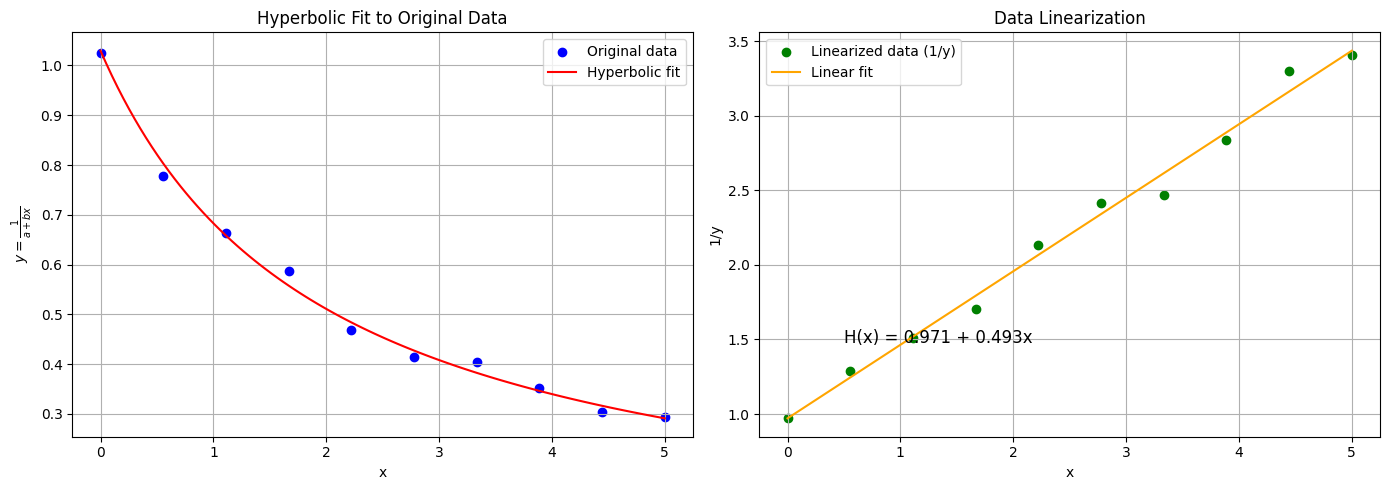

,x,y,1/y
0,0.000000,1.024836,0.975766
1,0.555556,0.777198,1.286673
2,1.111111,0.663676,1.506760
3,1.666667,0.586992,1.703602
4,2.222222,0.468138,2.136120
5,2.777778,0.413704,2.417187
6,3.333333,0.404610,2.471514
7,3.888889,0.352655,2.835636
8,4.444444,0.303060,3.299678
9,5.000000,0.293465,3.407560


In [6]:
# Re-importing necessary libraries after environment reset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def hyperbolic_analysis_with_reciprocal(df, x_col, y_col):
    """
    Perform hyperbolic model fitting, add 1/y column, and plot the results.

    Parameters:
    - df: DataFrame containing the data.
    - x_col: Column name for the independent variable.
    - y_col: Column name for the dependent variable.

    Returns:
    - DataFrame with an additional 1/y column.
    """
    # Extract data
    x = df[x_col].values
    y = df[y_col].values

    # Reciprocal transformation for linearization
    df['1/y'] = 1 / y
    H = df['1/y'].values

    # Linear regression for H(x) = a_0 + a_1 * x
    coefficients = np.polyfit(x, H, 1)
    a_1, a_0 = coefficients  # a_1 = slope (b), a_0 = intercept (a)

    # Adjusted function
    def adjusted_function(x_val):
        return 1 / (a_0 + a_1 * x_val)

    # Values for plotting
    x_fit = np.linspace(min(x), max(x), 100)
    y_fit = adjusted_function(x_fit)

    # Subplots
    fig, axs = plt.subplots(1, 2, figsize=(14, 5))

    # Plot 1: Original data with hyperbolic fit
    axs[0].scatter(x, y, color="blue", label="Original data")
    axs[0].plot(x_fit, y_fit, color="red", label="Hyperbolic fit")
    axs[0].set_title("Hyperbolic Fit to Original Data")
    axs[0].set_xlabel("x")
    axs[0].set_ylabel("$y = \\frac{1}{a + b x}$")
    axs[0].legend()
    axs[0].grid()

    # Plot 2: Linearized data with linear fit
    axs[1].scatter(x, H, color="green", label="Linearized data (1/y)")
    axs[1].plot(x_fit, a_0 + a_1 * x_fit, color="orange", label="Linear fit")
    axs[1].set_title("Data Linearization")
    axs[1].set_xlabel("x")
    axs[1].set_ylabel("1/y")
    axs[1].legend()
    # Add equation to the plot
    equation_text = f"H(x) = {a_0:.3f} + {a_1:.3f}x"
    axs[1].text(min(x) + 0.5, min(H) + 0.5, equation_text, fontsize=12, color="black")
    axs[1].grid()

    # Print results
    print("Linearized Equation:")
    print(f"H(x) = {a_0:.3f} + {a_1:.3f}x")
    print("")
    print(f"Hyperbolic Model:")
    print(f"y(x) = 1 / ({a_0:.3f} + {a_1:.3f}x)")

    # Show plots
    plt.tight_layout()
    plt.show()

    # Return the dataframe with the 1/y column added
    return df, fig


def generate_hyperbolic_data(a, b, size, x_min, x_max, error_scale=0.05, seed=None):
    """
    Generates a dataframe with hyperbolic data and small random error.

    Parameters:
    - a: Intercept for the hyperbolic function.
    - b: Slope for the hyperbolic function.
    - size: Number of data points to generate.
    - x_min: Minimum value of the independent variable x.
    - x_max: Maximum value of the independent variable x.
    - error_scale: Scale of the random error as a fraction of y.
    - seed: Random seed for reproducibility (default: None).

    Returns:
    - DataFrame with columns 'x' and 'y', where 'y' follows a hyperbolic model with added noise.
    """
    if seed is not None:
        np.random.seed(seed)
    
    # Generate linearly spaced x values
    x = np.linspace(x_min, x_max, size)
    
    # Generate the true hyperbolic data
    y_true = 1 / (a + b * x)
    
    # Add small random error
    error = np.random.normal(0, error_scale * y_true)
    y = y_true + error
    
    # Create the dataframe
    df = pd.DataFrame({"x": x, "y": y})
    return df


# Example usage with a generated dataframe
df_hyperbolic = generate_hyperbolic_data(a=1, b=0.5, size=10, x_min=0, x_max=5, error_scale=0.05, seed=42)
df_hyperbolic, fig_hyperbolic = hyperbolic_analysis_with_reciprocal(df_hyperbolic, "x", "y")
df_hyperbolic

## Linearization Model: Square Root Function

The original function is given by:
$$
y(x) = \sqrt{a + b x}
$$
To linearize this model, we square both sides of the equation:
$$
[y(x)]^2 = a + b x
$$
This transformation converts the square root relationship into a linear form. To simplify, we define:
- $H(x) = [y(x)]^2$,
- $a_0 = a$ (intercept),
- $a_1 = b$ (slope).
The linearized relationship becomes:
$$
H(x) = a_0 + a_1 x
$$
This linear form allows the use of Ordinary Least Squares (OLS) regression to estimate the parameters $a$ and $b$ from the transformed data, enabling the reconstruction of the original square root model.

Linearized Equation:
H(x) = 1.108 + 2.066x

Square Root Model:
y(x) = sqrt(1.108 + 2.066x)


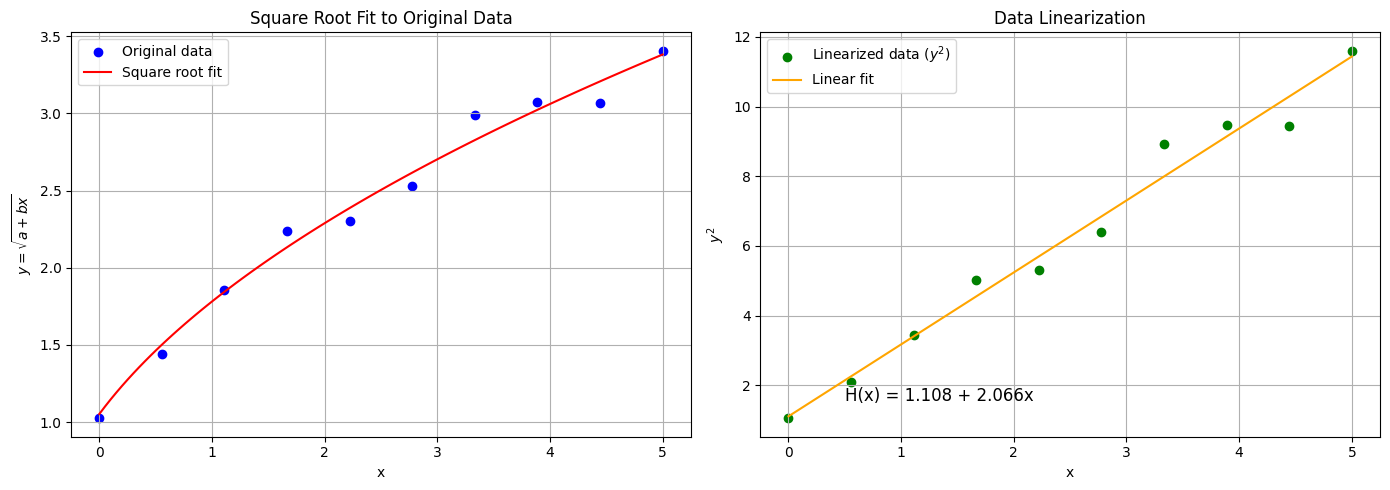

,x,y,y^2
0,0.000000,1.024836,1.050288
1,0.555556,1.442922,2.082023
2,1.111111,1.853187,3.434301
3,1.666667,2.240188,5.018442
4,2.222222,2.306015,5.317707
5,2.777778,2.530408,6.402964
6,3.333333,2.987507,8.925196
7,3.888889,3.076417,9.464339
8,4.444444,3.070844,9.430080
9,5.000000,3.406598,11.604911


In [7]:
def square_root_analysis_with_squared(df, x_col, y_col):
    """
    Perform square root model fitting, add y^2 column, and plot the results.

    Parameters:
    - df: DataFrame containing the data.
    - x_col: Column name for the independent variable.
    - y_col: Column name for the dependent variable.

    Returns:
    - DataFrame with an additional y^2 column.
    """
    # Extract data
    x = df[x_col].values
    y = df[y_col].values

    # Squared transformation for linearization
    df['y^2'] = y**2
    H = df['y^2'].values

    # Linear regression for H(x) = a_0 + a_1 * x
    coefficients = np.polyfit(x, H, 1)
    a_1, a_0 = coefficients  # a_1 = slope (b), a_0 = intercept (a)

    # Adjusted function
    def adjusted_function(x_val):
        return np.sqrt(a_0 + a_1 * x_val)

    # Values for plotting
    x_fit = np.linspace(min(x), max(x), 100)
    y_fit = adjusted_function(x_fit)

    # Subplots
    fig, axs = plt.subplots(1, 2, figsize=(14, 5))

    # Plot 1: Original data with square root fit
    axs[0].scatter(x, y, color="blue", label="Original data")
    axs[0].plot(x_fit, y_fit, color="red", label="Square root fit")
    axs[0].set_title("Square Root Fit to Original Data")
    axs[0].set_xlabel("x")
    axs[0].set_ylabel("$y = \\sqrt{a + b x}$")
    axs[0].legend()
    axs[0].grid()

    # Plot 2: Linearized data with linear fit
    axs[1].scatter(x, H, color="green", label="Linearized data ($y^2$)")
    axs[1].plot(x_fit, a_0 + a_1 * x_fit, color="orange", label="Linear fit")
    axs[1].set_title("Data Linearization")
    axs[1].set_xlabel("x")
    axs[1].set_ylabel("$y^2$")
    axs[1].legend()
    # Add equation to the plot
    equation_text = f"H(x) = {a_0:.3f} + {a_1:.3f}x"
    axs[1].text(min(x) + 0.5, min(H) + 0.5, equation_text, fontsize=12, color="black")
    axs[1].grid()

    # Print results
    print("Linearized Equation:")
    print(f"H(x) = {a_0:.3f} + {a_1:.3f}x")
    print("")
    print(f"Square Root Model:")
    print(f"y(x) = sqrt({a_0:.3f} + {a_1:.3f}x)")

    # Show plots
    plt.tight_layout()
    plt.show()

    # Return the dataframe with the y^2 column added
    return df, fig


def generate_square_root_data(a, b, size, x_min, x_max, error_scale=0.05, seed=None):
    """
    Generates a dataframe with square root data and small random error.

    Parameters:
    - a: Intercept for the square root function.
    - b: Slope for the square root function.
    - size: Number of data points to generate.
    - x_min: Minimum value of the independent variable x.
    - x_max: Maximum value of the independent variable x.
    - error_scale: Scale of the random error as a fraction of y.
    - seed: Random seed for reproducibility (default: None).

    Returns:
    - DataFrame with columns 'x' and 'y', where 'y' follows a square root model with added noise.
    """
    if seed is not None:
        np.random.seed(seed)
    
    # Generate linearly spaced x values
    x = np.linspace(x_min, x_max, size)
    
    # Generate the true square root data
    y_true = np.sqrt(a + b * x)
    
    # Add small random error
    error = np.random.normal(0, error_scale * y_true)
    y = y_true + error
    
    # Create the dataframe
    df = pd.DataFrame({"x": x, "y": y})
    return df


# Example usage with a generated dataframe
df_square_root = generate_square_root_data(a=1, b=2, size=10, x_min=0, x_max=5, error_scale=0.05, seed=42)
df_square_root, fig_square_root = square_root_analysis_with_squared(df_square_root, "x", "y")
df_square_root